In [3]:
import pandas as pd
import numpy as np
import pymysql
from getpass import getpass
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="root",
                       passwd=getpass(),
                       db="olist")

········


# How many sellers since 2017

In [9]:
seller_query = """
                SELECT DISTINCT
                    oi.seller_id
                FROM order_items oi
                INNER JOIN orders o
                    ON oi.order_id = o.order_id
                WHERE o.order_purchase_timestamp >= '2017-01-01'
                """

In [10]:
sellers = pd.read_sql(seller_query, conn)

In [11]:
sellers.head()

,seller_id
0,3504c0cb71d7fa48d967e0e4c94d59d9
1,289cdb325fb7e7f891c38608bf9e0962
2,4869f7a5dfa277a7dca6462dcf3b52b2
3,66922902710d126a0e7d26b0e3805106
4,2c9e548be18521d1c43cde1c582c6de8


In [13]:
sellers.shape

(3068, 1)

# How much sold per seller?

In [15]:
seller_qt = """
                SELECT 
                    oi.seller_id,
                    COUNT(oi.seller_id) AS items_sold
                FROM order_items oi
                INNER JOIN orders o
                    ON oi.order_id = o.order_id
                WHERE o.order_purchase_timestamp >= '2017-01-01'
                GROUP BY oi.seller_id
                """
seller_qty = pd.read_sql(seller_qt, conn)

In [16]:
seller_qty.shape

(3068, 2)

In [17]:
seller_qty.describe()

,items_sold
count,3068.000000
mean,36.597132
std,119.512140
min,1.000000
25%,2.000000
50%,8.000000
75%,25.000000
max,2033.000000


In [22]:
seller_qty.describe().loc["mean"]

items_sold    36.597132
Name: mean, dtype: float64

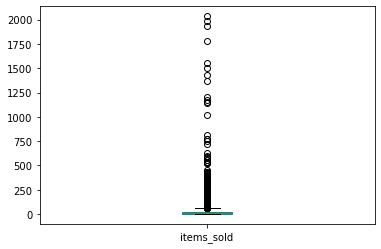

In [23]:
seller_qty["items_sold"].plot(kind="box")

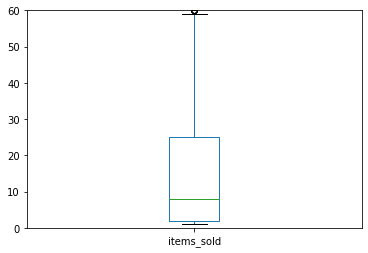

In [26]:
seller_qty["items_sold"].plot(kind="box", ylim=(0,60))

In [27]:
seller_qty.loc[seller_qty["items_sold"] > 58].shape

(409, 2)